In [1]:
import lasinglib as ll
import simulationlib as sl
import annealing_database2 as adb2
import matplotlib.pyplot as plt
import os
import dirtools as dt

os.chdir(os.path.abspath(''))

%matplotlib widget

MATRIX_DBPATH = r"./annealing records/50um TiW Matrix 2/matrix2.dill"
# initialize record-keeping database
database = adb2.DatabaseWrapper(MATRIX_DBPATH)

# write commands directly to TAP directory
TAP_dbpath = r"C:\Users\ssuub\Desktop\MPSD-TAP\TAPV-2\Application\pythonFiles\DataTextFiles"

# initialize lasing grid
CHIP = sl.SimGrid(dimension=32, resolution=101, thickness=0.03, use_spar=False,
                  spar_thickness=0.5, spar_width=1)

# manual last-minute coordinate system adjustments; these should be the same as the ones specified under TAP's settings.csv
CENTERING_OFFSETS = (-2, -1.5)

# Suggested firing locations (x, y):
MATRIX_LEFT = (14, 16.5)
MATRIX_RIGHT = (18, 16.5)

In [22]:
# Configure laser pulse parameters

# anything you want to write down about the pulse before commiting to the DB
notes = "80C repeated shots: 5s x 180, LEFT"

duration = 5 # seconds
power = 4.7 # watts

repetition_count = 180 # how many times to fire this pulse
delay = 5 # how long to wait between pulses in seconds, can also be an array.

position = MATRIX_LEFT

# create the LaserPulse
pulse = ll.LaserPulse(grid=CHIP, start=0, duration=duration, position=position, power=power)

# Build a LaserSequence out of LaserPulses

pulses = [pulse] * repetition_count

seq = ll.LaserSequence(pulses=pulses, delay=delay, start_time=0)

LaserSequence(['Pulse(4.700W, 0.000 + 5.000S -> 5.000NOMOD)', 'Pulse(4.700W, 10.000 + 5.000S -> 15.000NOMOD)', 'Pulse(4.700W, 20.000 + 5.000S -> 25.000NOMOD)', 'Pulse(4.700W, 30.000 + 5.000S -> 35.000NOMOD)', 'Pulse(4.700W, 40.000 + 5.000S -> 45.000NOMOD)', 'Pulse(4.700W, 50.000 + 5.000S -> 55.000NOMOD)', 'Pulse(4.700W, 60.000 + 5.000S -> 65.000NOMOD)', 'and 174 additional pulse(s).']) 180


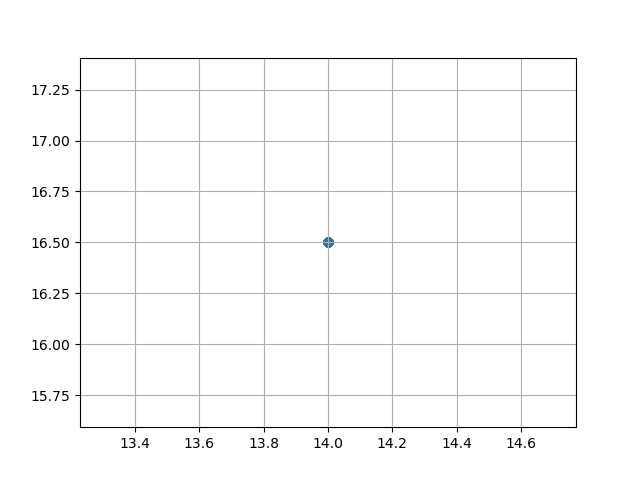

In [23]:
# Visualize the sequence if needed

seq.build_trace()

print(seq, len(pulses))
fig, ax = plt.subplots()
ax.scatter(seq.trace_x, seq.trace_y, alpha=.3)
ax.grid()

In [24]:
# Finally, compile the sequence into instructions executable via TAP
seq.write_to_cycle_code(TAP_dbpath + "/michaeltest1.txt", 0.03, *CENTERING_OFFSETS)

In [25]:
# If you have actually fired this pattern on the chip, save it to the annealing database record!
database.write_sequence(seq, notes=notes)

CSV modified


C:\Users\ssuub\Desktop\Damage analysis\EDET80k_Damage\Lasing Analysis\apps\Simulation and BeamLib\annealing_database2.py:323: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S.%f format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  return pd.read_csv(db.csvpath, sep=',', parse_dates=["Date"], dayfirst=True)
C:\Users\ssuub\Desktop\Damage analysis\EDET80k_Damage\Lasing Analysis\apps\Simulation and BeamLib\annealing_database2.py:323: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S.%f format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  return pd.read_csv(db.csvpath, sep=',', parse_dates=["Date"], dayfirst=True)


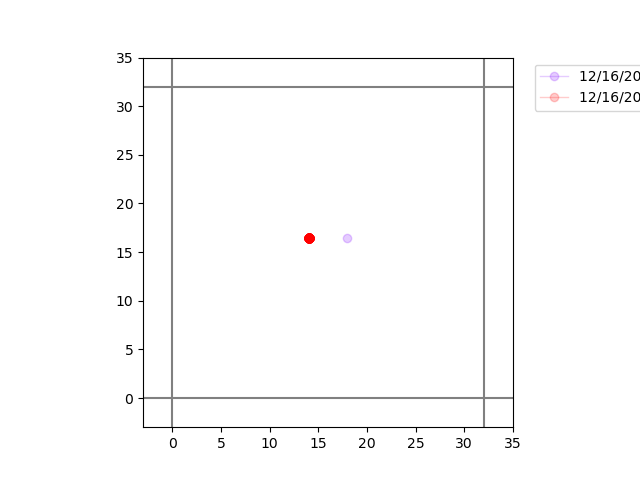

In [26]:
# view the current database entries
database.visualize()